# Regression Algorithm in Machine Learning

### Regression is all about taking lots of data and plot graph or space of the data and then we build lines to seprate diffrent types of data throgh line or place... so the whole thing is to draw a lineor curve in case of 2D data and then we can predict future values or can do classification thing too...

### So there are 2 types of Regression 
### 1. Linear regression -- we can draw simple straight line in this case to seprate or predict values
### 2. logistic regression -- here we have more than one independent variables that determine outcome.

### Here first we discuss Linear Regression and develop a program which will predict stock value of any company

## Importing libraries

In [4]:
import sklearn
import quandl, datetime, math
import pandas as pd
import numpy as np
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

### We will use googl stock data in order to predict next future value of stock using linear regression

In [3]:
df=quandl.get('WIKI/GOOGL')

### syle we use for ploting graph uning matplotlib

In [5]:
style.use('ggplot')

## Refining of usefull data

In [6]:
df=df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]
df['HL_PCT']=(df['Adj. High']-df['Adj. Low'])/df['Adj. Close']*100.0
df['PCT_Change']=(df['Adj. Close']-df['Adj. Open'])/df['Adj. Open']*100.0

df=df[['Adj. Close','HL_PCT','PCT_Change','Adj. Volume']]


## Forcasting data

In [11]:
forecast_col='Adj. Close'
df.fillna(-99999, inplace=True) #gettin rid of null data

forecast_out = int(math.ceil(0.01*len(df)))

df['label']=df[forecast_col].shift(-forecast_out)

## lets train the model and find accuracy

In [12]:
x=np.array(df.drop(['label'],1))
x=preprocessing.scale(x)
x_lately=x[-forecast_out:]
x=x[:-forecast_out]

df.dropna(inplace=True)
y=np.array(df['label'])

X_train, X_test, Y_train, Y_test= cross_validation.train_test_split(x, y, test_size=0.2)


### finding accuracy as per LinearRegression algo

In [13]:
'''clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, Y_train)
accuracy=clf.score(X_test, Y_test)
print(accuracy)

with open('Linearregression.pickle','wb') as f:
    pickle.dump(clf,f)'''

0.9619688081061948


### finding accuracy as per Support vector Regression

In [14]:
'''clf = svm.SVR()
clf.fit(X_train, Y_train)
accuracy=clf.score(X_test, Y_test)
print(accuracy)

with open('SVR.pickle','wb') as f:
    pickle.dump(clf,f)'''

0.8248736655181971


#### opps here in SVR we have accuracy about 84 %. Mean while LinearRegression Algorithm is far more better then SVR, so run that Again so that Values will be taken from LinearRegreation in further code for greater accuracy 

#### The next thing we can do is to store trained data into a pickle file bcz for a large companies like google its not possible to do trainig thing again and again bcz there data can be in TB.. So run taining algo ones and then either comment it or not run it.. and save pickle data using below code.

In [16]:
pickle_in = open('Linearregression.pickle', 'rb')
clf=pickle.load(pickle_in)

## lets do forcast thing and draw up graph

In [17]:
forecast_set=clf.predict(x_lately)
print(forecast_set, accuracy, forecast_out)

df['Forecast']=np.nan

last_date=df.iloc[-1].name
last_unix= last_date.timestamp()
one_day= 86400
next_unix= last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date]= [np.nan for _ in range(len(df.columns)-1)]+ [i]


[810.0751809  812.07909138 808.38511916 810.91282863 809.25208757
 811.31636139 808.61556561 821.45915636 816.87403521 820.07359122
 812.04320268 812.66323914 814.76761579 828.35701268 835.02319256
 829.40910192 832.05190272 843.44616225 835.52750619 829.39757668
 824.16303334 824.78946615 816.69096319 812.23923667 794.50270733
 789.64738667 788.17775306 809.4724077  819.049104   811.78739446
 782.84853096] 0.8248736655181971 31


### lets map whole data on graph

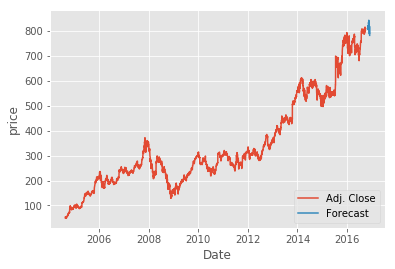

In [20]:
plt.plot(df['Adj. Close'])
plt.plot(df['Forecast'])
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('price')
plt.show()

###### now we have graph of future prediction with >96 % accuracy which is really great. Means we are predictting values of stock in next 30 days with >96 % accuracy.